# Observations and Insights

* Of the ten drugs tested on mice, four proved to reduce the average volume of tumors the most: Capomulin, Ramicane, Infubinol, and Ceftamin
* Looking at the boxplot, we see that only one drug regimen, Infubinol, has an outlier. Using the text "An Introduction to Error Analysis" by John R. Taylor, I wanted to see if this piece of data is a candidate for removal with the use of Chauvenet's Criterion. Performing the calculations, the data value falls outside two standard deviations away, and is less than the value of Chauvenet's Criterion. Therefore, the data point is a candidate for rejection.
* We see there is a strong positive linear correlation between the weight of a mouse on the drug Capomulin and the average tumor volume with a correlation value of 0.84. We can surmise from this that the more a mouse weights, the larger the tumor volume in said mouse.
* The r-value of 0.71 shows we have a decent linear regression model.
* Creating a histogram of tumor volumes in the study, we see that the volumes match up with a Gaussian curve well. The majority of tumor volumes was around 50 cubic millimetres, and no outliers strongly stand out on either tail of the data. This is good evidence that the study and results were well performed.

In [1]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pylab

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = 'left')
combined_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
combined_study_df['Mouse ID'].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df = combined_study_df[combined_study_df[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#use .loc and use for a particular mouse g989
dup_mouse_df = combined_study_df.loc[combined_study_df['Mouse ID'] == 'g989']
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_study_df.drop_duplicates(['Mouse ID', 'Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].count()

1888

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen
regimen_df = combined_study_df.groupby(["Drug Regimen"])

# running the statistical calculations with pandas
mean_regimen = regimen_df['Tumor Volume (mm3)'].mean()
median_regimen = regimen_df['Tumor Volume (mm3)'].median()
variance_regimen = regimen_df['Tumor Volume (mm3)'].var()
std_regimen = regimen_df['Tumor Volume (mm3)'].std()
sem_regimen= regimen_df['Tumor Volume (mm3)'].sem()

# creating a dataframe to hold all of the stats information
stats_table = pd.DataFrame({"Mean Tumor Volume (mm3)" : mean_regimen,
                           "Median Tumor Volume (mm3)" : median_regimen,
                           "Variance in Tumor Volume (mm3)" : variance_regimen,
                           "Standard Deviation in Tumor Volume" : std_regimen,
                           "Standard Error of Tumor Volume" : sem_regimen})

stats_table

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance in Tumor Volume (mm3),Standard Deviation in Tumor Volume,Standard Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

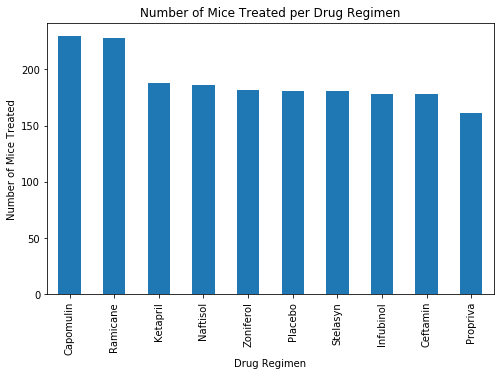

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
# using pandas. 

panPlot = combined_study_df['Drug Regimen'].value_counts().plot(kind = 'bar', title = 'Number of Mice Treated per Drug Regimen', 
                                                         figsize = (8,5))
panPlot.set_xlabel('Drug Regimen');
panPlot.set_ylabel('Number of Mice Treated');

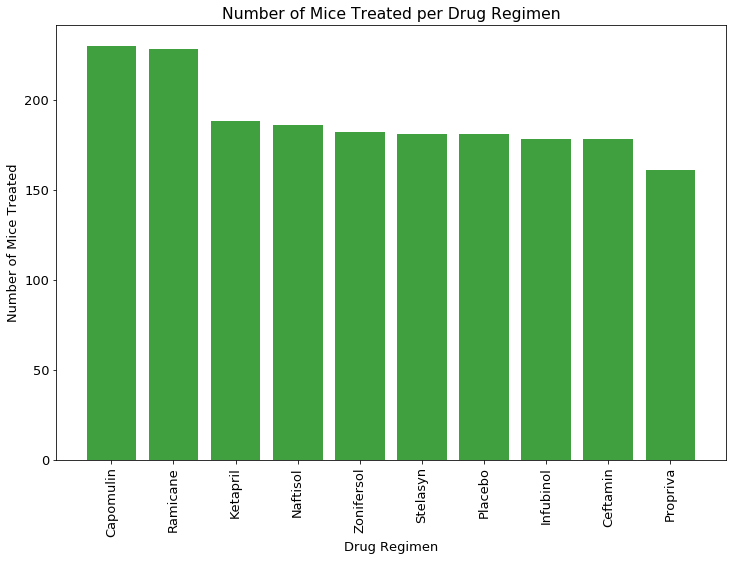

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
# using pyplot.
bar_x_axis = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zonifersol', 'Stelasyn', 'Placebo',
             'Infubinol', 'Ceftamin', 'Propriva']
bar_y_axis = combined_study_df['Drug Regimen'].value_counts()

plt.figure(figsize=(12,8))
pylab.rc('font', family='sans', size = 13)
plt.xticks(rotation='vertical')
plt.bar(bar_x_axis, bar_y_axis, color='g', alpha=0.75, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")
plt.title("Number of Mice Treated per Drug Regimen")

plt.show()

## Pie Plots

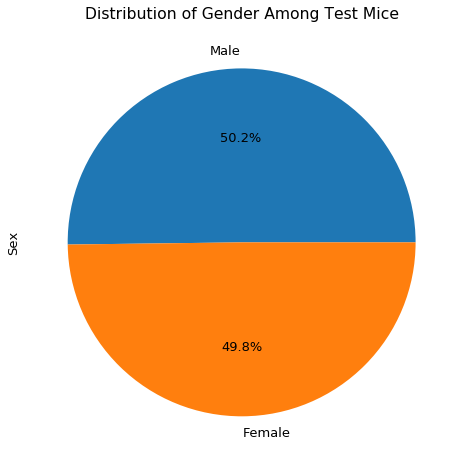

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
panPie = mouse_metadata['Sex'].value_counts().plot(kind = 'pie', title = 'Distribution of Gender Among Test Mice', 
                                                   figsize = (8,8), autopct='%1.1f%%')

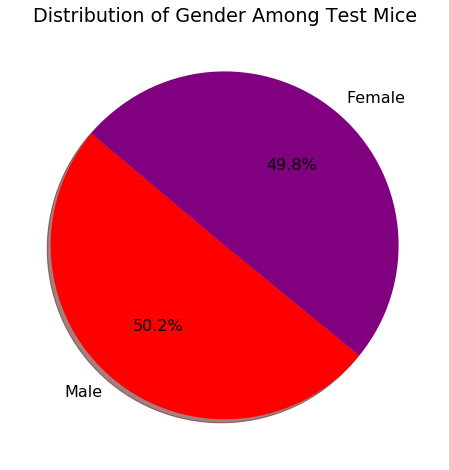

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8,8))
pylab.rc('font', family='sans', size = 16)
plt.title("Distribution of Gender Among Test Mice")
plt.pie(mouse_metadata['Sex'].value_counts(), labels=['Male', 'Female'], colors=["Red", "Purple"],
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively deter`mine if there are any potential outliers.

# Creating and calculating IQR & quartiles for Capomulin
cap_df = combined_study_df.loc[combined_study_df['Drug Regimen'] == 'Capomulin']

# To find the final tumor volume need to get the volume at the max timepoint
cap_group = cap_df.groupby('Mouse ID').max()['Timepoint']

# Create a final tumor volume dataframe by merging...
cap_f_tumor_vol = pd.merge(cap_group, combined_study_df, on = ('Mouse ID', 'Timepoint'))

quartiles = cap_f_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'The lower quartile for Capomulin is {round(lowerq, 2)}')
print(f'The upper quartile for Capomulin is {round(upperq, 2)}')
print(f'The interquartile range for Capomulin is {round(iqr, 2)}')
print(f"Values below {round(lower_bound, 2)} could be outliers for Capomulin.")
print(f"Values above {round(upper_bound, 2)} could be outliers for Capomulin.")

The lower quartile for Capomulin is 32.38
The upper quartile for Capomulin is 40.16
The interquartile range for Capomulin is 7.78
Values below 20.7 could be outliers for Capomulin.
Values above 51.83 could be outliers for Capomulin.


In [13]:
# Dataframe for Ramicane drug
ram_df = combined_study_df.loc[combined_study_df['Drug Regimen'] == 'Ramicane']
ram_group = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_f_tumor_vol = pd.merge(ram_group, combined_study_df, on = ('Mouse ID', 'Timepoint'))

quartiles = ram_f_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'The lower quartile for Ramicane is {round(lowerq, 2)}')
print(f'The upper quartile for Ramicane is {round(upperq, 2)}')
print(f'The interquartile range for Ramicane is {round(iqr, 2)}')
print(f"Values below {round(lower_bound, 2)} could be outliers for Ramicane.")
print(f"Values above {round(upper_bound, 2)} could be outliers for Ramicane.")

The lower quartile for Ramicane is 31.56
The upper quartile for Ramicane is 40.66
The interquartile range for Ramicane is 9.1
Values below 17.91 could be outliers for Ramicane.
Values above 54.31 could be outliers for Ramicane.


In [14]:
# Dataframe for Infubinol
infu_df = combined_study_df.loc[combined_study_df['Drug Regimen'] == 'Infubinol']
infu_group = infu_df.groupby('Mouse ID').max()['Timepoint']
infu_f_tumor_vol = pd.merge(infu_group, combined_study_df, on = ('Mouse ID', 'Timepoint'))

quartiles = infu_f_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'The lower quartile for Infubinol is {round(lowerq, 2)}')
print(f'The upper quartile for Infubinol is {round(upperq, 2)}')
print(f'The interquartile range for Infubinol is {round(iqr, 2)}')
print(f"Values below {round(lower_bound, 2)} could be outliers for Infubinol.")
print(f"Values above {round(upper_bound, 2)} could be outliers for Infubinol.")

The lower quartile for Infubinol is 54.05
The upper quartile for Infubinol is 65.53
The interquartile range for Infubinol is 11.48
Values below 36.83 could be outliers for Infubinol.
Values above 82.74 could be outliers for Infubinol.


In [15]:
# Dataframe for Ceftamin
ceft_df = combined_study_df.loc[combined_study_df['Drug Regimen'] == 'Ceftamin']
ceft_group = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceft_f_tumor_vol = pd.merge(ceft_group, combined_study_df, on = ('Mouse ID', 'Timepoint'))

quartiles = ceft_f_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'The lower quartile for Ceftamin is {round(lowerq, 2)}')
print(f'The upper quartile for Ceftamin is {round(upperq, 2)}')
print(f'The interquartile range for Ceftamin is {round(iqr, 2)}')
print(f"Values below {round(lower_bound, 2)} could be outliers for Ceftamin.")
print(f"Values above {round(upper_bound, 2)} could be outliers for Ceftamin.")

The lower quartile for Ceftamin is 48.72
The upper quartile for Ceftamin is 64.3
The interquartile range for Ceftamin is 15.58
Values below 25.36 could be outliers for Ceftamin.
Values above 87.67 could be outliers for Ceftamin.


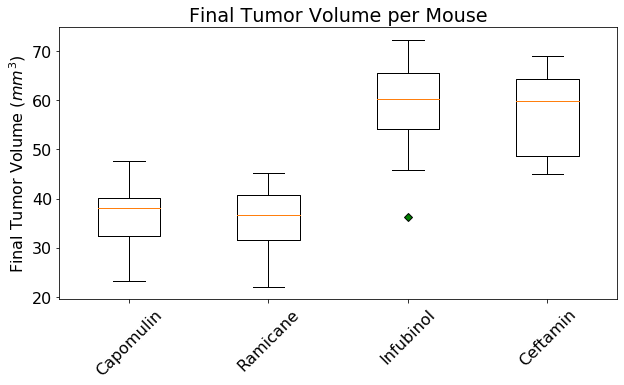

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
cap_boxplot = cap_f_tumor_vol['Tumor Volume (mm3)']
ram_boxplot = ram_f_tumor_vol['Tumor Volume (mm3)']
infu_boxplot = infu_f_tumor_vol['Tumor Volume (mm3)']
ceft_boxplot = ceft_f_tumor_vol['Tumor Volume (mm3)']

green_diamond = dict(markerfacecolor='g', marker='D')

fig1, ax1 = plt.subplots(figsize = (10,5))
ax1.set_title('Final Tumor Volume per Mouse')
ax1.set_ylabel('Final Tumor Volume ($mm^3$)')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol' ,'Ceftamin'], rotation=45)
ax1.boxplot([cap_boxplot, ram_boxplot, infu_boxplot, ceft_boxplot], flierprops=green_diamond)

plt.show()

In [24]:
# Finding the value of the outlier on Infubinol
infu_boxplot.min()

36.321345799999996

In [28]:
# Chauvenet's Criterion
t_sus = abs(36.321346 - 52.884795)/6.567243
t_sus
prob = 1 - 0.988
print(prob * combined_study_df['Mouse ID'].count())
print(0.05 * combined_study_df['Mouse ID'].count())

22.71600000000002
94.65


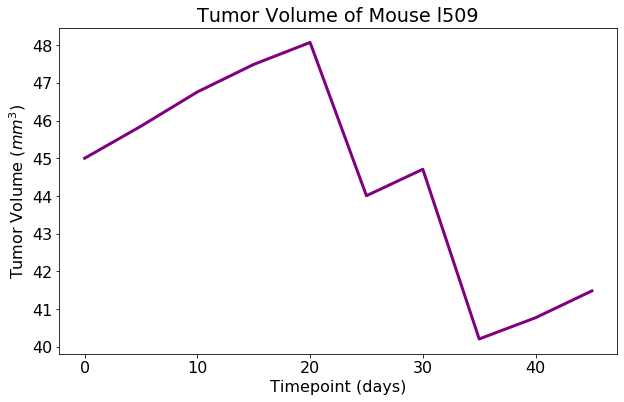

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
mouse_df = cap_df.loc[cap_df['Mouse ID'] == 'l509']

timepoint = mouse_df.iloc[:,5]
tumor_vol = mouse_df.iloc[:,6]

plt.figure(figsize=(10,6))
pylab.rc('font', family='sans', size = 16)

plt.plot(timepoint, tumor_vol, lw = 3, c = "purple")
plt.title("Tumor Volume of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume ($mm^3$)")

plt.show()

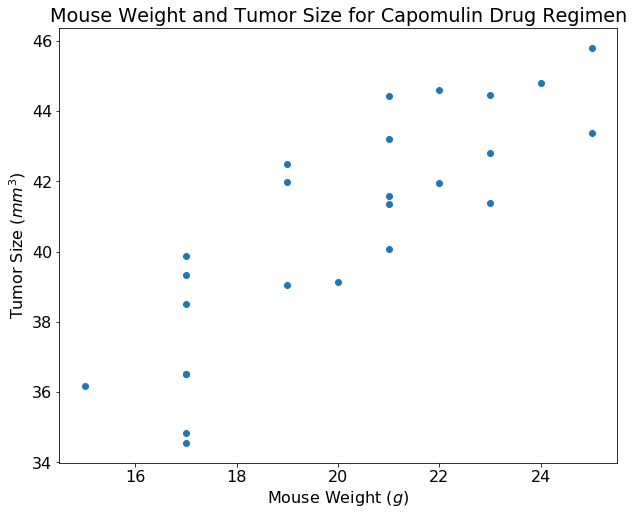

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_scatter = cap_df.groupby("Mouse ID").mean()
mouse_scatter_x = mouse_scatter['Weight (g)']
mouse_scatter_y = mouse_scatter['Tumor Volume (mm3)']

plt.figure(figsize=(10,8))
pylab.rc('font', family='sans', size = 16)
plt.scatter(mouse_scatter_x, mouse_scatter_y)
plt.xlabel("Mouse Weight ($g$)")
plt.ylabel("Tumor Size ($mm^3$)")
plt.title("Mouse Weight and Tumor Size for Capomulin Drug Regimen")

plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# correlation coefficient calculations and result
correlation = st.pearsonr(mouse_scatter_x, mouse_scatter_y)

# linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_scatter_x, mouse_scatter_y)
regress_values = mouse_scatter_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation factor between mouse weight (in grams) and tumor volume (per cubic millimetre) is {round(correlation[0],2)}")
print(f"The r-squared value is: {round(rvalue**2, 2)}")
print(f"The equation of the line is {line_eq} and returns a volume in cubic millimetres")

The correlation factor between mouse weight (in grams) and tumor volume (per cubic millimetre) is 0.84
The r-squared value is: 0.71
The equation of the line is y = 0.95x + 21.55 and returns a volume in cubic millimetres


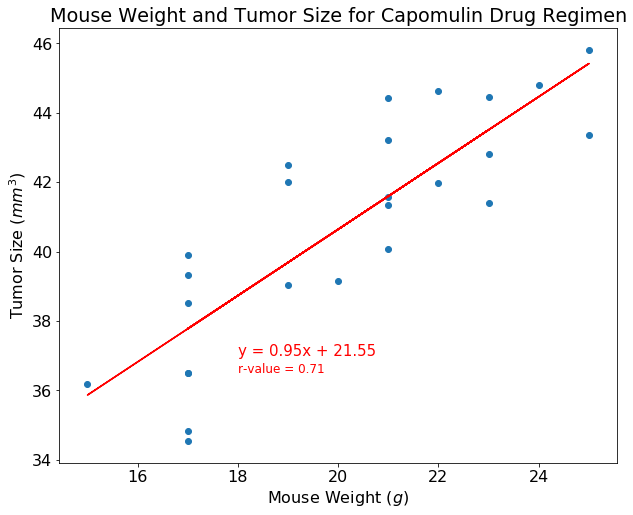

In [21]:
# combining the linear regression with the scatter plot

plt.figure(figsize=(10,8))
pylab.rc('font', family='sans', size = 16)
plt.plot(mouse_scatter_x,regress_values,"r-")
plt.annotate(line_eq,(18,37),fontsize=15,color="red")
plt.annotate(f'r-value = {round(rvalue**2, 2)}', (18, 36.5), fontsize=12,color='red')
plt.scatter(mouse_scatter_x, mouse_scatter_y)
plt.xlabel("Mouse Weight ($g$)")
plt.ylabel("Tumor Size ($mm^3$)")
plt.title("Mouse Weight and Tumor Size for Capomulin Drug Regimen")

plt.show()

# Why Not Do a Histogram Distribution

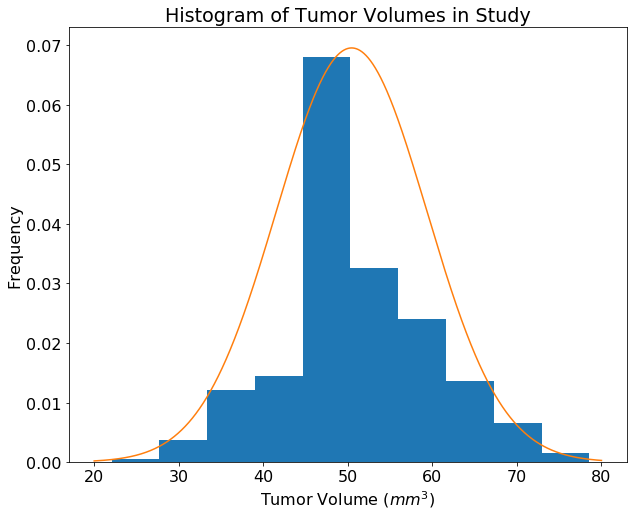

In [22]:
# I am curious about the distribution of the Tumor Volumes for the study. It is a decent number,
# so it should fall into a Gaussian curve, and any outliers will also pop out quickly. This was our
# 'bread and butter' method in my data analysis class from grad school, and was a good sign that my
# thesis project was performing as I was hoping.
# I had to look back at my old data analysis code to get the Gaussian curve code,
# and I forgot the formula to accurately normalize the curve, so I did that by eye

from scipy.stats import norm  

# Fits normal distribution to the dataset
mu, std = norm.fit(combined_study_df['Tumor Volume (mm3)'])

# Output the tumor data and the gaussian. Need to normalize the gaussian.
combined_study_df['Tumor Volume (mm3)'].plot(kind = 'hist', density = True, figsize = (10,8), 
                                            title = "Histogram of Tumor Volumes in Study")
plt.xlabel("Tumor Volume ($mm^3$)")
range = np.arange(20, 80, 0.001)
plt.plot(range, 1.55*norm.pdf(range,mu, std))
plt.show()